In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/output/Out_20.csv', index_col=0)
df

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8,rul,rul_diff,group
0,,,,,,,,,,,
2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968,-827.558889,NaN,0
2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728,-827.511944,0.046944,0
2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845,-827.428611,0.083333,0
2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760,-827.345278,0.083333,0
2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815,-827.261944,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459,-7.540000,0.166667,10
2003-11-25 23:13:21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247,-0.443056,7.096944,10
2003-11-25 23:19:56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123,-0.333333,0.109722,10


In [3]:
df.columns

Index(['b1_ch1', 'b1_ch2', 'b2_ch3', 'b2_ch4', 'b3_ch5', 'b3_ch6', 'b4_ch7',
       'b4_ch8', 'rul', 'rul_diff', 'group'],
      dtype='object')

In [4]:
energy_data = df[['b1_ch1', 'b1_ch2', 'b2_ch3', 'b2_ch4', 'b3_ch5', 'b3_ch6', 'b4_ch7', 'b4_ch8']]
energy_data

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8
0,,,,,,,,
2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968
2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728
2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845
2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760
2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815
...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459
2003-11-25 23:13:21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247
2003-11-25 23:19:56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123


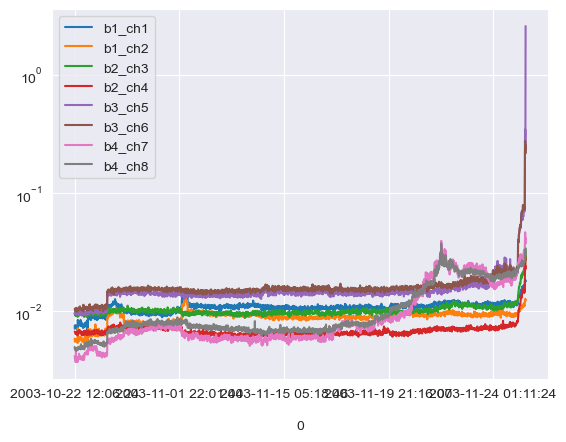

In [6]:
energy_data.plot()
plt.yscale('log')

In [7]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

log_function = FunctionTransformer(func=lambda x: np.log(x), inverse_func=lambda x: np.exp(x))
minmax_scaler = MinMaxScaler()
pca = PCA(n_components=4)


<AxesSubplot:xlabel='\n0'>

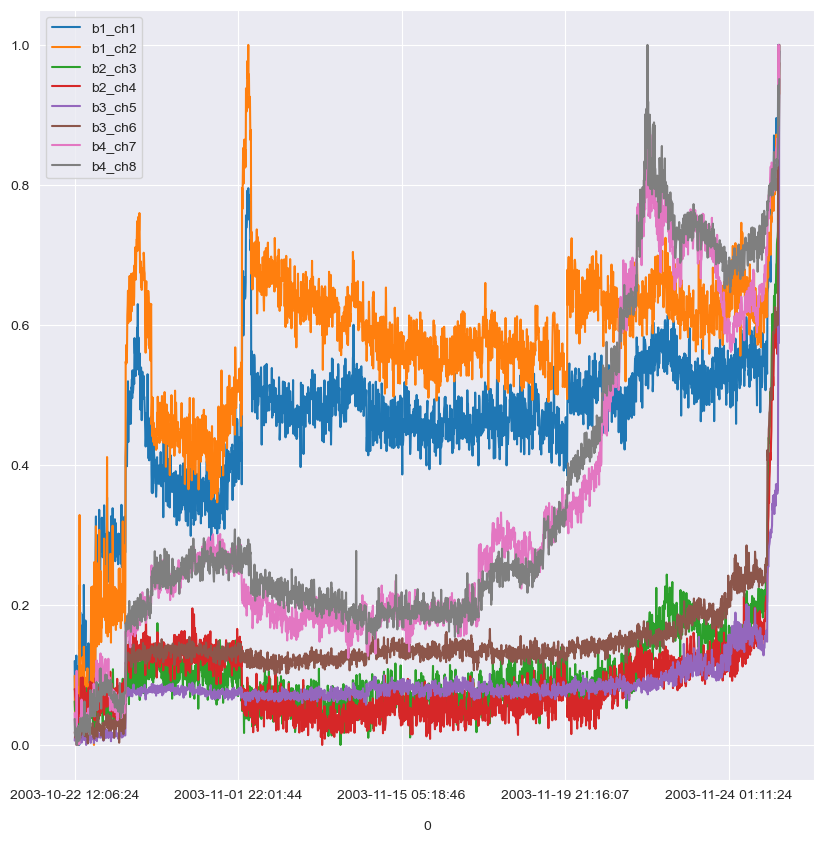

In [9]:
log_energy_data = log_function.transform(energy_data)
log_energy_data = pd.DataFrame(minmax_scaler.fit_transform(log_energy_data), columns=energy_data.columns, index=energy_data.index)
log_energy_data.plot(figsize=(10, 10))

<AxesSubplot:xlabel='\n0'>

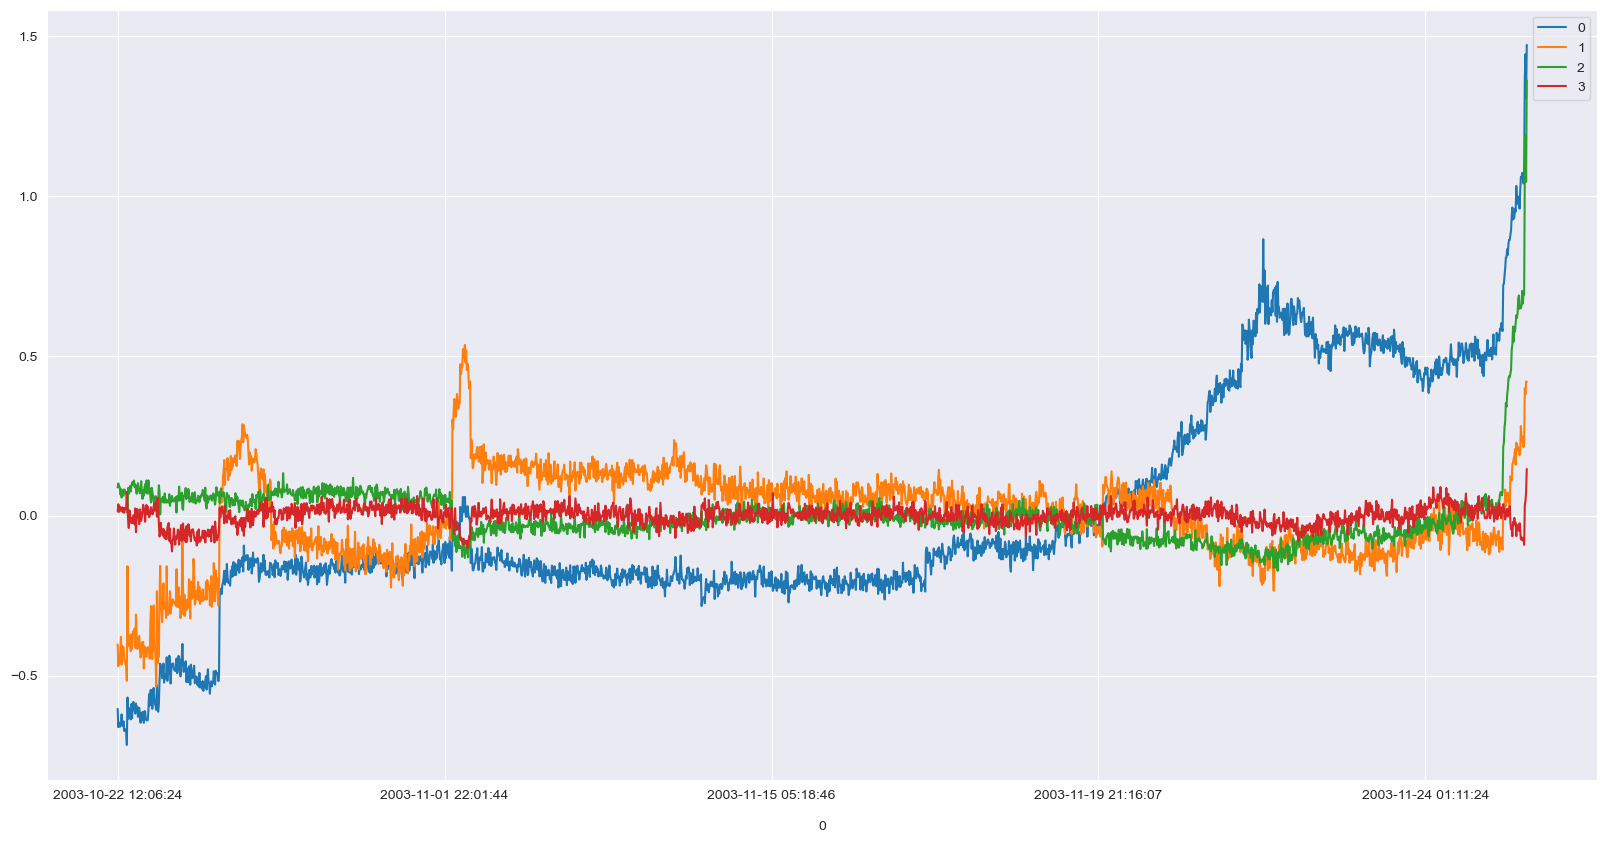

In [13]:
energy_pca = pd.DataFrame(pca.fit_transform(log_energy_data), index=energy_data.index)
energy_pca.plot(figsize=(20, 10))

In [15]:
# energy_pca新增一列数据
energy_pca['rul'] = df['rul']
energy_pca

,0,1,2,3,rul
0,,,,,
2003-10-22 12:06:24,-0.604297,-0.402645,0.088451,0.013294,-827.558889
2003-10-22 12:09:13,-0.661583,-0.470980,0.100842,0.035953,-827.511944
2003-10-22 12:14:13,-0.646810,-0.447221,0.090714,0.012025,-827.428611
2003-10-22 12:19:13,-0.659091,-0.462865,0.090454,0.028971,-827.345278
2003-10-22 12:24:13,-0.659818,-0.420878,0.066636,0.019720,-827.261944
...,...,...,...,...,...
2003-11-25 16:07:32,1.084481,0.225559,0.692513,-0.091082,-7.540000
2003-11-25 23:13:21,1.369846,0.398113,1.078403,0.032049,-0.443056
2003-11-25 23:19:56,1.444424,0.380516,1.189274,0.046499,-0.333333


<AxesSubplot:xlabel='\n0'>

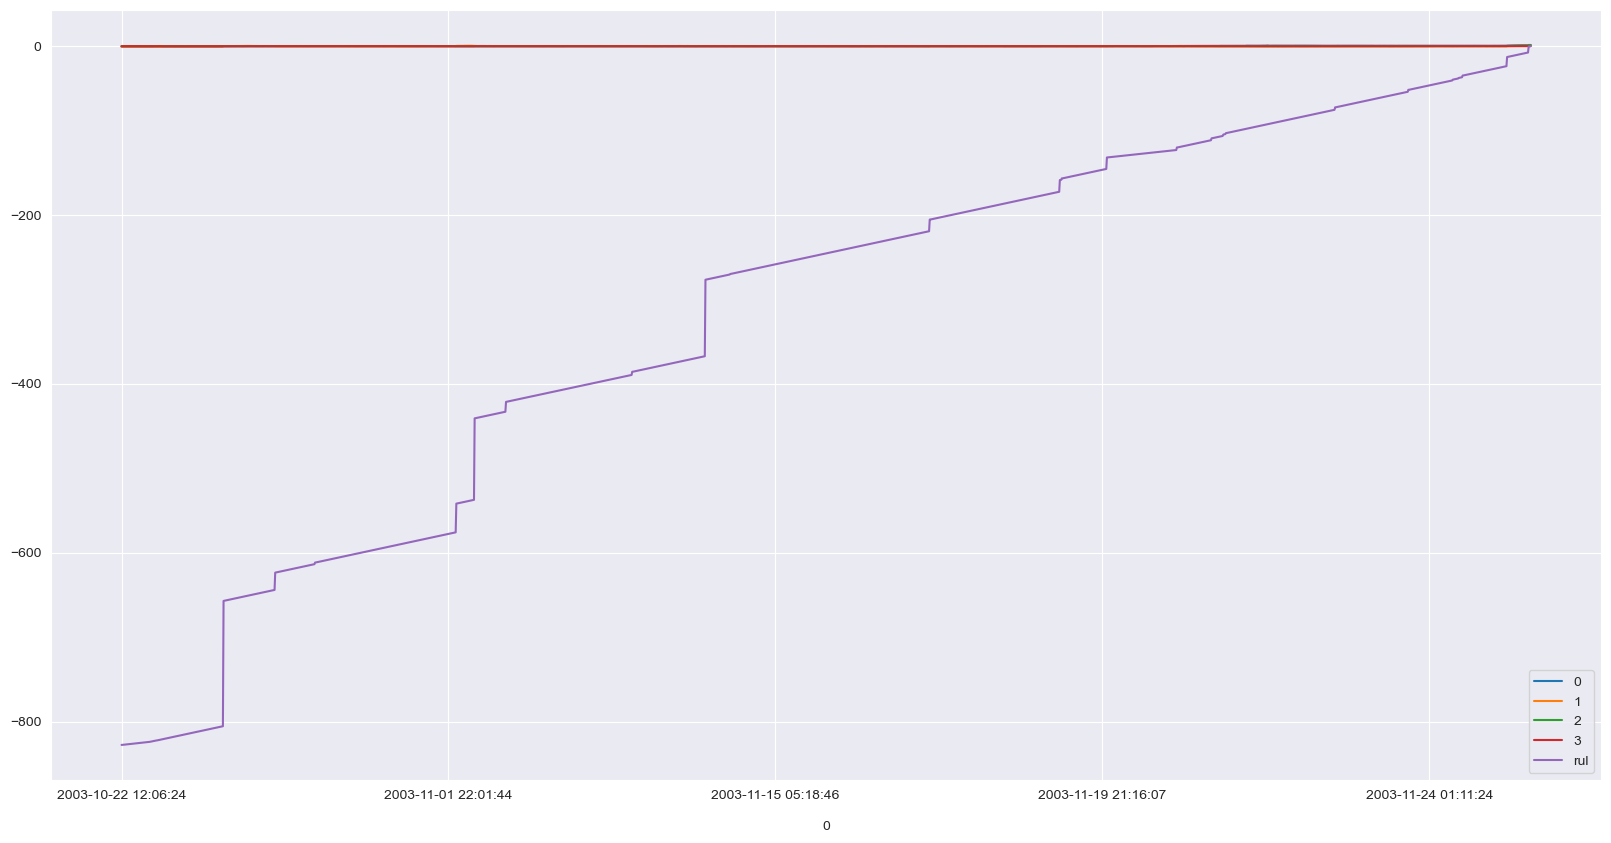

In [19]:
energy_pca.plot(figsize=(20, 10))

# RUL预测模型

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [21]:
torch.cuda.is_available()

True

In [837]:
class rul_net(nn.Module):
    def __init__(self, input_size, output_size):
        super(rul_net, self).__init__()
        layer1 = [
            nn.Conv1d(in_channels=input_size, out_channels=16, kernel_size=4, stride=1, padding=1),
            nn.ReLU()
        ]
        layer2 = [
            nn.Conv1d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        ]
        # layer3 = [
        #     nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU()
        # ]
        # layer4 = [
        #     nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool1d(kernel_size=2, stride=2)
        # ]

        self.conv1 = nn.Sequential(*layer1)
        self.conv2 = nn.Sequential(*layer2)
        # self.conv3 = nn.Sequential(*layer3)
        # self.conv4 = nn.Sequential(*layer4)        
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, output_size)
        pass

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        # out = self.conv3(out)
        # out = self.conv4(out)        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)   
        out = F.relu(self.fc3(out))
        return out
    pass

In [838]:
net = rul_net(input_size=4, output_size=2)

In [766]:
print(net)

rul_net(
  (conv1): Sequential(
    (0): Conv1d(1, 16, kernel_size=(4,), stride=(1,), padding=(1,))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv1d(16, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=64, out_features=15, bias=True)
)


In [161]:
test = torch.randn(100, 4, 4)
test

tensor([[[-1.1421e+00,  7.1641e-01,  5.2185e-01,  3.5879e-02],
         [-8.2876e-02, -1.6576e-01,  1.6466e+00, -1.4100e-01],
         [ 1.8702e-01,  1.3513e+00, -1.4931e+00, -5.6246e-01],
         [ 9.2596e-01, -1.6214e-01,  6.1165e-01, -8.5627e-01]],

        [[ 7.0284e-01,  7.2160e-01,  1.1843e-01, -5.3195e-02],
         [-6.4790e-01, -1.3760e+00, -1.4071e+00, -5.2989e-01],
         [ 1.4168e+00, -2.1908e-01,  6.5248e-01, -8.6536e-01],
         [ 2.3435e+00,  1.6090e+00,  9.6664e-01,  8.3864e-01]],

        [[-8.4448e-02, -8.2732e-01, -3.9841e-04,  1.4911e-01],
         [-7.0890e-01,  3.4387e-01, -7.9729e-01, -1.0041e+00],
         [ 4.5497e-01,  1.1982e+00, -3.1003e-01, -1.8816e+00],
         [-9.9970e-01, -9.1779e-01, -2.0786e+00,  1.2453e+00]],

        ...,

        [[-1.6862e+00,  4.5637e-01,  1.3286e+00,  2.3148e+00],
         [-1.5855e-01,  1.2324e+00, -9.0865e-01,  3.2222e-01],
         [ 1.8614e+00, -1.1401e+00, -3.3044e-01, -8.7571e-01],
         [ 1.2074e+00, -2.6849e-01,

In [162]:
net(test)

tensor([[-1.1397e-01,  1.3905e-02,  3.4679e-02, -9.7182e-02],
        [-1.1219e-01, -1.4086e-02,  2.6117e-02, -1.0232e-01],
        [-7.9984e-02,  5.9194e-03,  3.4852e-02, -1.0098e-01],
        [-1.2324e-01,  3.0461e-03,  2.9663e-02, -1.0611e-01],
        [-1.1439e-01,  1.9355e-02,  3.4399e-02, -1.0230e-01],
        [-9.6529e-02,  1.0848e-02,  4.0184e-02, -1.0560e-01],
        [-1.1066e-01, -2.8002e-03,  3.4082e-02, -1.2327e-01],
        [-8.3453e-02,  4.7379e-03,  4.1326e-02, -1.0724e-01],
        [-1.0692e-01, -5.4737e-03,  2.7686e-02, -9.8888e-02],
        [-1.1105e-01,  4.0627e-03,  4.3840e-02, -9.4421e-02],
        [-1.2195e-01,  9.3267e-03,  2.8345e-02, -1.2254e-01],
        [-1.3049e-01,  6.8630e-03,  4.0836e-02, -9.3693e-02],
        [-1.1494e-01, -4.1037e-03,  4.5737e-02, -1.0153e-01],
        [-1.1619e-01, -1.5716e-02,  4.4319e-02, -9.7445e-02],
        [-9.6366e-02, -2.3187e-03,  3.6569e-02, -8.7495e-02],
        [-1.1805e-01, -1.3022e-03,  3.7875e-02, -8.6926e-02],
        

In [55]:
energy_data = pd.read_csv('../data/output/rul.csv', index_col=0,  sep=',', header=None)

In [56]:
energy_data

,1,2,3,4,5
0,,,,,
2003-10-22 12:06:24,-0.604297,-0.402645,0.088451,0.013294,-827.558889
2003-10-22 12:09:13,-0.661583,-0.470980,0.100842,0.035953,-827.511944
2003-10-22 12:14:13,-0.646810,-0.447221,0.090714,0.012025,-827.428611
2003-10-22 12:19:13,-0.659091,-0.462865,0.090454,0.028971,-827.345278
2003-10-22 12:24:13,-0.659818,-0.420878,0.066636,0.019720,-827.261944
...,...,...,...,...,...
2003-11-25 16:07:32,1.084481,0.225559,0.692513,-0.091082,-7.540000
2003-11-25 23:13:21,1.369846,0.398113,1.078403,0.032049,-0.443056
2003-11-25 23:19:56,1.444424,0.380516,1.189274,0.046499,-0.333333


In [57]:
data_x =  energy_data.iloc[:, 0:4].values
data_x

array([[-0.604297, -0.402645,  0.088451,  0.013294],
       [-0.661583, -0.47098 ,  0.100842,  0.035953],
       [-0.64681 , -0.447221,  0.090714,  0.012025],
       ...,
       [ 1.444424,  0.380516,  1.189274,  0.046499],
       [ 1.305955,  0.419999,  1.045057,  0.074624],
       [ 1.473284,  0.418956,  1.362766,  0.146563]])

In [58]:
data_y = energy_data.iloc[:, 4].values
data_y

array([-8.27558889e+02, -8.27511944e+02, -8.27428611e+02, ...,
       -3.33333000e-01, -1.66667000e-01,  0.00000000e+00])

In [846]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(0, 30))
log_function = FunctionTransformer(func=lambda x: np.int_(x / 24), inverse_func=lambda x: np.int_(x * 24))
lg_f = FunctionTransformer(func=lambda x: np.log(x), inverse_func=lambda x: np.exp(x))
y_log = log_function.fit_transform(data_y.reshape(-1, 1))
y =  scaler_y.fit_transform(y_log.reshape(-1, 1))

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:137: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


In [847]:
y = np.where(y < 23, 0, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

onehot测试

In [848]:
num_class = 2
one_hot = np.eye(num_class)[np.int64(y)]
one_hot

array([[[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       ...,

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]]])

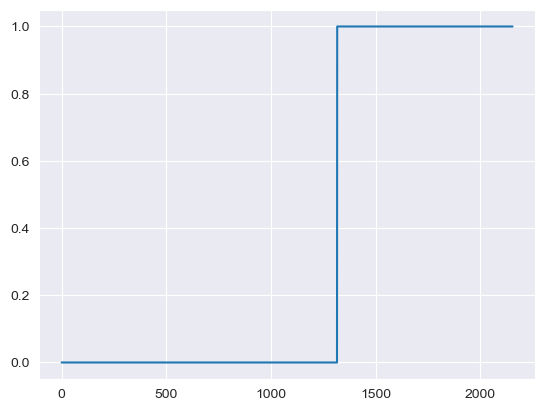

In [849]:
plt.plot(y)

In [498]:
log_function.inverse_transform(y_log)

array([[-816],
       [-816],
       [-816],
       ...,
       [   0],
       [   0],
       [   0]])

In [850]:
# x = lg_f.fit_transform(data_x)
x = scaler_x.fit_transform(data_x)


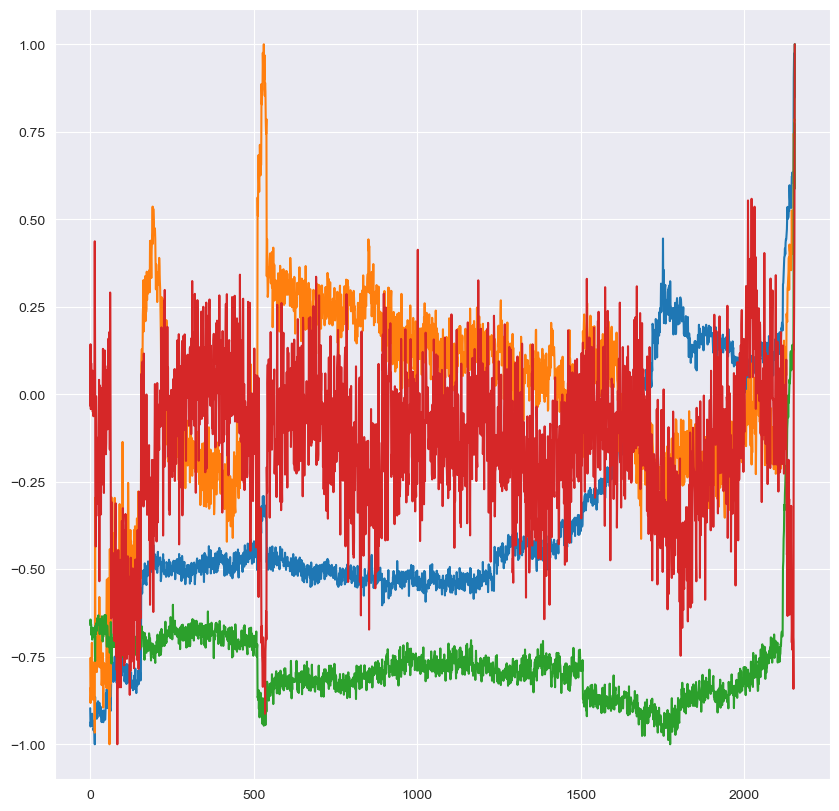

In [851]:
plt.figure(figsize=(10, 10))
plt.plot(x)

In [743]:
x

array([[-0.89689597, -0.75397429, -0.65971491, -0.03271676],
       [-0.94919987, -0.88189837, -0.64357641,  0.14287043],
       [-0.93571166, -0.83742119, -0.65676749, -0.04255039],
       ...,
       [ 0.97364992,  0.71211418,  0.77403761,  0.22459259],
       [ 0.84722343,  0.78602691,  0.58620407,  0.44253644],
       [ 1.        ,  0.7840744 ,  1.        ,  1.        ]])

In [744]:
y

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [15.],
       [15.],
       [15.]])

In [853]:
x_new = []
y_new = []
for i in range(len(x)):
    x_new.append(x[i])
    y_new.append(np.average(y[i]))
    pass
x_new = np.array(x_new)
y_new = np.array(y_new)

In [854]:
tensor_x = torch.Tensor(x_new)
tensor_y = torch.Tensor(one_hot)

In [855]:
tensor_x

tensor([[-0.8969, -0.7540, -0.6597, -0.0327],
        [-0.9492, -0.8819, -0.6436,  0.1429],
        [-0.9357, -0.8374, -0.6568, -0.0426],
        ...,
        [ 0.9736,  0.7121,  0.7740,  0.2246],
        [ 0.8472,  0.7860,  0.5862,  0.4425],
        [ 1.0000,  0.7841,  1.0000,  1.0000]])

In [856]:
sss = tensor_y.cpu().numpy()
sss

array([[[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       ...,

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]]], dtype=float32)

In [857]:
tensor_y.size()

torch.Size([2156, 1, 2])

In [858]:
tensor_x = tensor_x.unsqueeze(1)

In [751]:
torch.cuda.is_available()

True

In [859]:
if torch.cuda.is_available():
    tensor_x = tensor_x.cuda()
    tensor_y =  tensor_y.cuda()
    tensor_x = tensor_x.float()
    tensor_y = tensor_y.float()
    net = net.cuda()

In [860]:
from torch.utils.data import TensorDataset, DataLoader

dateset_tensor = TensorDataset(tensor_x, tensor_y)
data_loader = DataLoader(dataset=dateset_tensor, batch_size=32, shuffle=True)

In [861]:
from torch import optim


def train(module=nn.Module, data_loader=torch.utils.data.DataLoader, epochs=int):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(module.parameters(), lr=0.001)
    reducer = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                  mode='min', factor=0.1, patience=10,
                                                  verbose=False, threshold=1e-4, threshold_mode='rel',
                                                  cooldown=0, min_lr=0, eps=1e-8)
    
    if torch.cuda.is_available():
        loss_function = loss_function.cuda()
        module = module.cuda()
        pass
    
    train_hist = np.zeros(epochs)
    
    for i in range(epochs):
        for  x_t, y_t in data_loader:
            pre = module(x_t)
            # pre = pre.squeeze()
            y_t = y_t.squeeze()
            tr_loss = loss_function(pre, y_t)
            # tr_loss.requires_grad_(True)
            
            # if i % 10 == 0:
            #     print(f'Epoch {i} train loss: {tr_loss.item()}')
            #     pass
            # 
            # train_hist[i] = tr_loss.item()
            prediction = torch.max(F.softmax(pre), 1)[1]
            prediction = prediction.cpu()
            prediction = prediction.detach().numpy()
            target = y_t.cpu().numpy()
            acc = np.sum(prediction == target)
            train_hist[i] = acc
            
            optimizer.zero_grad()
            tr_loss.backward()
            optimizer.step()
            reducer.step(tr_loss)
        pass

    return module.eval(), train_hist
    
    pass


In [581]:
net = net.train()

In [862]:
module, train_history = train(module=net, data_loader=data_loader, epochs=500)

RuntimeError: Given groups=1, weight of size [16, 4, 4], expected input[32, 1, 4] to have 4 channels, but got 1 channels instead

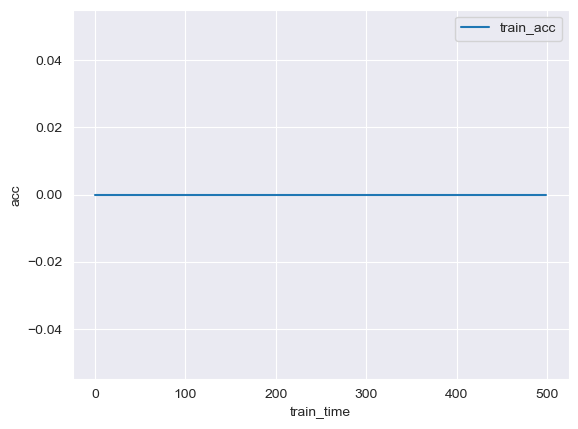

In [834]:
plt.figure(1)
plt.plot(train_history, label='train_acc')
plt.ylabel('acc')
plt.xlabel('train_time')
plt.legend()
plt.show()

In [829]:
y_out = module(tensor_x)
y_out = y_out.cpu()
y_out = y_out.detach().numpy()

In [830]:
y_out

array([[0.1429198 , 0.        ],
       [0.15243345, 0.        ],
       [0.13792281, 0.        ],
       ...,
       [0.        , 0.20196116],
       [0.02658892, 0.21451016],
       [0.03214298, 0.25574833]], dtype=float32)

In [831]:
y_out_pre = np.argmax(y_out, axis=1)
y_out_pre

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [661]:
y_out = log_function.inverse_transform(y_out)
y = data_y

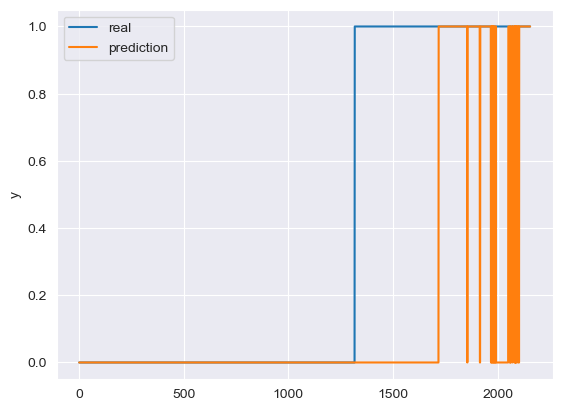

In [832]:
plt.figure(2)
plt.plot(y, label='real')
plt.plot(y_out_pre, label='prediction')
plt.ylabel('y')
plt.legend()


In [833]:
(y == y_out)

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False, False],
       [False, False],
       [False, False]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


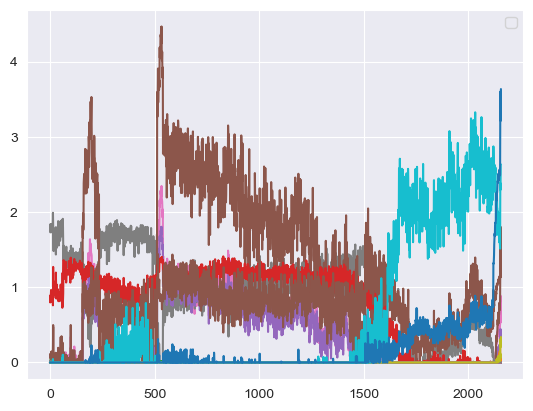

In [626]:
plt.plot(y_out)
plt.legend()

RuntimeError: The size of tensor a (64) must match the size of tensor b (31) at non-singleton dimension 2